In [1]:
import numpy as np 
import sklearn.svm
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

 Importation de la Base de données

In [2]:
os.chdir('/Users/farah/Documents/INFO/Cours_ET4/MachineLearning/ProjetIA')
heartt = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', header=0)
heart = heartt.iloc[np.random.permutation(heartt.index)].reset_index(drop=True)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,68.0,1,220,0,35,1,289000.0,0.9,140,1,1,20,1
1,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112,0
2,65.0,1,59,1,60,0,172000.0,0.9,137,0,0,107,0
3,53.0,1,707,0,38,0,330000.0,1.4,137,1,1,209,0
4,50.0,1,54,0,40,0,279000.0,0.8,141,1,0,250,0


In [3]:
heartt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

target = ['DEATH_EVENT']

In [5]:
#iris_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
                 
# Extract features
#A = heart.loc[:, iris_features].values

In [6]:
target

['DEATH_EVENT']

Etablissement des matrices

In [4]:
X = np.asarray(features)
Y = np.asarray(target)
print("Le X est de dimension" , X.shape )
print("Le Y est de dimension" , Y.shape )

Le X est de dimension (12,)
Le Y est de dimension (1,)


In [67]:
A = heart.loc[:, features].values
A.shape

(299, 12)

In [6]:
B = heart.loc[:, target].values

In [7]:
n =  X.shape[0]
B.shape, A.shape

((299, 1), (299, 12))

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf_cross = svm.SVC(kernel='linear', C=2, random_state=42)
scores = cross_val_score(clf_cross, A, B, cv=5)
scores

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

array([0.8       , 0.81666667, 0.85      , 0.78333333, 0.76271186])

In [12]:
clf_test = svm.SVC(kernel='linear', C=2, random_state=42).fit(X_train, Y_train)
score_fit = clf_test.score(X_test, Y_test)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
ordonnées1 = score
ordonnées2 = np.array(valeurs_valid_score)
abscisse = np.array([0,1,2,3,4,5,6,7,9,10,11])
plt.plot(abscisse, ordonnées1)
plt.plot(abscisse, ordonnées2)
plt.show()

In [16]:
scores.shape

(5,)

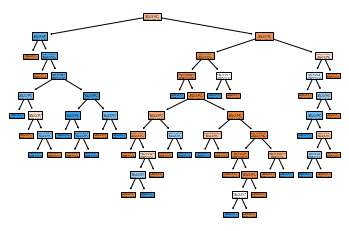

In [11]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, Y_train)
tree.plot_tree(clf_tree, filled=True)
with open("heart.dot", 'w') as f:
    f = tree.export_graphviz(clf_tree, out_file=f, filled=True)

In [ ]:
mse = np.sum( (Y_predict-Y_train)**2 ) / 1000.0
plt.plot(mse[:,20])

plt.title('How to caclulate the mean squared error in  python ?',fontsize=8)

plt.xlabel(fontsize=8)
plt.ylabel("mean square error",fontsize=8)

positions = [i*10 for i in range(10)]
labels = [i for i in range(10)]

plt.xticks(positions, labels)

plt.grid(linestyle='--')

plt.savefig("mean_squared_error_04.png", bbox_inches='tight')

#plt.show()

In [31]:
ordonnées1 = np.array(valeurs_train_score)
ordonnées2 = np.array(valeurs_valid_score)
abscisse = np.array([0,1,2,3,4,5,6,7,9,10,11])
plt.plot(abscisse, ordonnées1)
plt.plot(abscisse, ordonnées2)
plt.show()

In [20]:
def load_train_et_val(X_TRAIN,place):
    taille = X_TRAIN.shape[0]
    decoupe = int(taille/5)
    if place == 5 :
        X_train = A[: decoupe*4]
        y_train = B[: decoupe*4]
        X_valid = A[decoupe*4:taille] # X[-Ntest:] est equivalent
        y_valid = B[decoupe*4:taille] # X[-Ntest:] est equivalent
    if place == 4 :
        numeroX1 = A[0: decoupe*3]
        numeroX2 = A[decoupe*4:taille]
        numeroY1 = B[0: decoupe*3]
        numeroY2 = B[decoupe*4:taille] 
        X_train = np.concatenate((numeroX1,numeroX2))
        y_train = np.concatenate((numeroY1,numeroY2))
        X_valid = A[decoupe:decoupe*2] # X[-Ntest:] est equivalent
        y_valid = B[decoupe:decoupe*2] # X[-Ntest:] est equivalentalid = B[decoupe*3:decoupe*4] # X[-Ntest:] est equivalent
    if place == 3 :
        numeroX1 = A[0: decoupe*2]
        numeroX2 = A[decoupe*3:taille]
        numeroY1 = B[0: decoupe*2]
        numeroY2 = B[decoupe*3:taille] 
        X_train = np.concatenate((numeroX1,numeroX2))
        y_train = np.concatenate((numeroY1,numeroY2))
        X_valid = A[decoupe:decoupe*2] # X[-Ntest:] est equivalent
        y_valid = B[decoupe:decoupe*2] # X[-Ntest:] est equivalent
    if place == 2 :
        numeroX1 = A[0: decoupe]
        numeroX2 = A[decoupe*2:taille]
        numeroY1 = B[0: decoupe]
        numeroY2 = B[decoupe*2:taille] 
        X_train = np.concatenate((numeroX1,numeroX2))
        y_train = np.concatenate((numeroY1,numeroY2))
        X_valid = A[decoupe:decoupe*2] # X[-Ntest:] est equivalent
        y_valid = B[decoupe:decoupe*2] # X[-Ntest:] est equivalent
    if place == 1 :
        X_train = A[decoupe*2:taille]
        y_train = B[decoupe*2:taille]
        X_valid = A[:decoupe] # X[-Ntest:] est equivalent
        y_valid = B[:decoupe] # X[-Ntest:] est equivalent
    return X_train, y_train, X_valid, y_valid

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
valeurs_train_score = []
valeurs_test_score = []
it = 1
n = X.shape[0]
while it < n :
    preProc = sklearn.decomposition.PCA(n_components=it) 
    preProc.fit(X_train)
    X_train_prov = preProc.transform(X_train)
    X_test_prov = preProc.transform(X_test)
    clf_prov = svm.SVC(kernel='linear', C=2)
    clf_prov.fit(X_train_prov, Y_test)
    #score_train_prov = clf_prov.score(X_train_prov)
    #score_test_prov = clf_prov.score(X_test_prov)
   # valeurs_train_score.apprend(score_train_prov)
    #valeurs_test_score(score_test_prov)
    it = it+1
    

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Found input variables with inconsistent numbers of samples: [239, 60]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
valeurs_train_score = []
valeurs_test_score = []
it = 1
n = X.shape[0]
while it < n :
    A_prov = A[:,:it]
    X_train_prov, X_test_prov, Y_train_prov, Y_test_prov = train_test_split(A_prov, B, test_size=0.2, random_state=42)
    #x1_train_prov_bis, y1_train_prov_bis, X1_valid_prov, y1_valid_prov = load_train_et_val(X_train_prov,1)
    clf_ = sklearn.svm.SVC(kernel='linear', C=2)
    clf_.fit(X_train_prov,Y_train_prov)
    #score_train_prov = clf_.score(X_train_prov,Y_train_prov)
    #clf_.fit(X_test_prov,Y_test_prov)
    #score_test_prov = clf_.score(X_test_prov,Y_test_prov)
    #valeurs_train_score.append(score_train_prov)
    #valeurs_test_score.append(score_test_prov)
    it = it+1

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


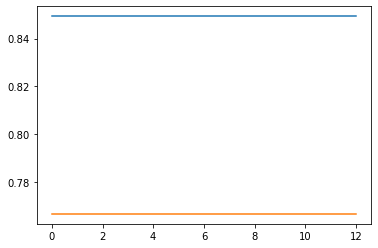

In [27]:
ordonnées1 = np.array(valeurs_train_score)
ordonnées2 = np.array(valeurs_test_score)
abscisse = np.array([0,1,2,3,4,5,6,7,9,10,11,12])
plt.plot(abscisse, ordonnées1)
plt.plot(abscisse, ordonnées2)
plt.show()

In [31]:
valeurs_train_score[3]

0.8493723849372385

Répartissons nos entrainements et nos tests

In [10]:
from sklearn.model_selection import train_test_split
#On prends 70% de trains et 20% de tests
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state=42)


In [28]:
taille_données = A.shape[0]
taille_données

299

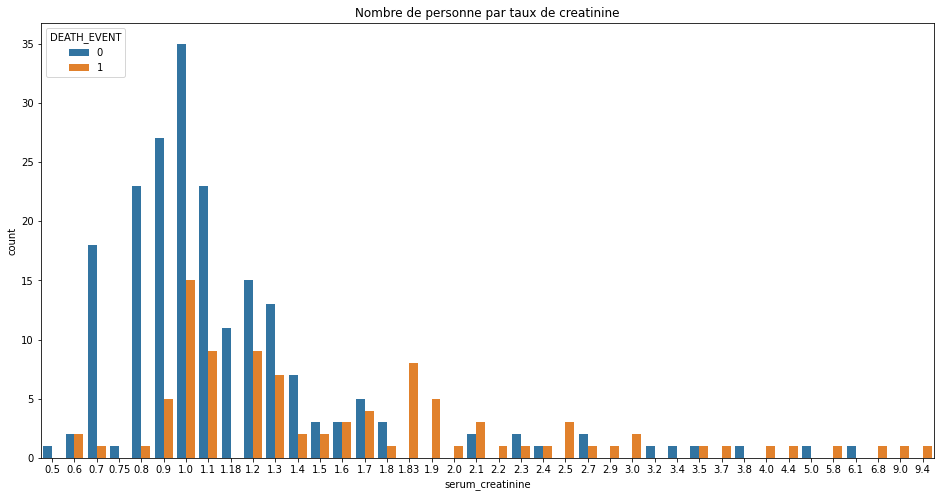

In [11]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    #plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'serum_creatinine',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux de creatinine")
    plt.show()

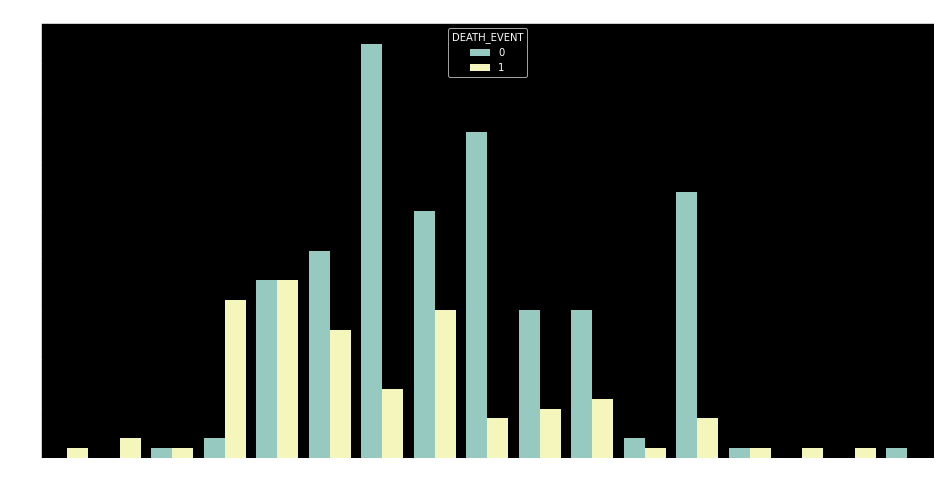

In [12]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'ejection_fraction',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux d'ejection fraction")
    plt.show()

In [13]:
print("Les X_train ont maintenant 209 lignes -->", X_train.shape)

Les X_train ont maintenant 209 lignes --> (239, 12)


On effectue maintenant une SVM

In [14]:
from sklearn import svm
clf = sklearn.svm.SVC(kernel='linear', C=2)
clf.fit(X_train,Y_train)
y_predict = clf.predict(X_test)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, Y_test)

0.7666666666666667

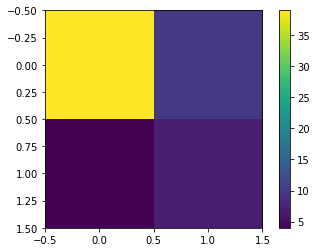

In [18]:
plt.imshow(confmat) ## imshow plutot que contourf, pour ne pas lisser les valeurs.
plt.colorbar() ## pour montrer l'échelle, sur la droite

In [17]:
confmat = sklearn.metrics.confusion_matrix(y_predict, Y_test)
confmat

array([[39, 10],
       [ 4,  7]])

In [32]:
print("training score:",clf.score(X_train,Y_train))
print("test score:",clf.score(X_test,Y_test))

training score: 0.6694560669456067
test score: 0.7166666666666667


In [114]:
def load_subSets(X, ratio_train, ratio_valid):
    ratio_test = 1 - ratio_train - ratio_valid #
    assert(ratio_test>0)
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = A[0: Ntrain].copy()
    y_train = B[0: Ntrain].copy()
    X_valid = A[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    y_valid = B[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    X_test  = A[-Ntest:].copy()
    y_test  = B[-Ntest:].copy()
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [127]:
ratio_train = 0.6
ratio_train = 0.3

In [131]:
## TODO: faire l'apprentissage supervisé des classes ,
## a l'aide d'un SVM polynomial de degre 2 (et avec C=1, coef0 = 1)
linear_training_score = []
linear_valid_score = []
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(A,ratio_train, ratio_valid)
## TODO: pour differentes valeurs de n_components, realiser une PCA
## puis un apprentissssage supervise des classes
# nComp_range = 
# for nC in nComp_range:
it = 1
nComp_range = np.arange(1, A.shape[1])
for nC in nComp_range:
    preProc = sklearn.decomposition.PCA(n_components=nC) ## TODO
    preProc.fit( X_train)
    ## TODO: transformer les donnees selon cette transformation apprise
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)
    C=1
    degree =2 
    kernel = 'poly'
    clf = sklearn.svm.SVC(C=C, kernel=kernel, degree=degree)
    clf
    clf.fit(X_train_Transformed, y_train)
    ## TODO: calculer les scores a l'aide de clf.score()
    trainscore = clf.score(X_train_Transformed, y_train) # TODO
    validscore = clf.score(X_valid_Transformed, y_valid)
    trainscore, validscore
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    linear_training_score.append(trainscore)
    linear_valid_score.append(validscore)




nombre Composants 1    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 2    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 3    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 4    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 5    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 6    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 7    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 8    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 9    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 10    training score: 0.7303370786516854 . valid score: 0.6271186440677966
nombre Composants 11    training score: 0.7303370786516854 . valid score: 0.627

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [109]:
nComp_range = np.arange(1, A.shape[1])
nComp_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

(0.5, 1.0)

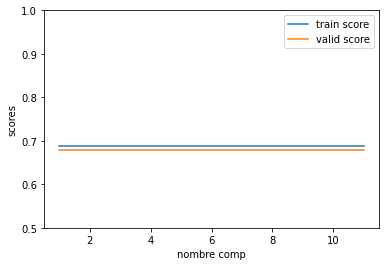

In [117]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])

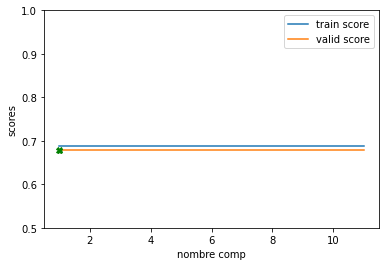

In [118]:
## plot des scores en fonction de l'hyper-param. nc
plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])
## affichage du meilleur point (ensemble de validation)
## ici on fait un choix primaire, sans tenir compte d el'overfitting, etc:
## il peut etre affiné a la main
bestIndex = np.argmax(linear_valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')

In [21]:
#from sklearn import model_selection
#scores_res = model_selection.cross_val_score(clf, A, B, cv=5)

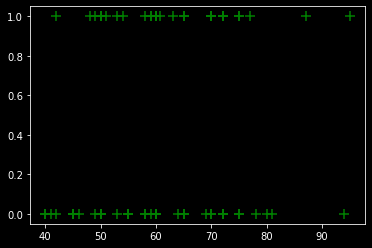

In [16]:
suppVect = clf.support_vectors_ ## TODO : recuperer les vecteurs supports, en utilisant l'objet "clf"
size=100
plt.scatter(suppVect[:,0],suppVect[:,1], c = 'green', s = size, marker='+')
## TODO: tracer aussi les points de l'ensemble de validation (en plus petits, ou autres couleur, etc)

In [20]:
features2 = ['ejection_fraction', 'serum_creatinine']

target2 = ['DEATH_EVENT'] 

In [78]:
X_train.shape[0]*4

224

In [159]:
#Mettre la position
x1_train, y1_train, X1_valid, y1_valid = load_train_et_val(X_train,3)

In [160]:
x1_train.shape, y1_train.shape, X1_valid.shape, y1_valid.shape, 

((192, 12), (192, 1), (47, 12), (47, 1))

In [223]:
from sklearn import tree

clf_train1 = sklearn.svm.SVC(kernel='linear', C=1)
clf_train1.fit(x1_train,y1_train)
print(clf_train1.score(x1_train,y1_train))

clf_train = tree.DecisionTreeClassifier()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7708333333333334


In [221]:
clf_valid1 = sklearn.svm.SVC(kernel='linear', C=1)
clf_valid1.fit(X1_valid,y1_valid)
print(clf_valid1.score(X1_valid,y1_valid))


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8085106382978723


In [6]:
it = 1
while it < 6 :
    x1_train, y1_train, X1_valid, y1_valid = load_train_et_val(X_train,it)
    clf_valid1 = sklearn.svm.SVC(kernel='linear', C=1)
    clf_valid1.fit(X1_valid,y1_valid)
    print(clf_valid1.score(X1_valid,y1_valid))

NameError: name 'X_train' is not defined

((192, 12), (192, 1), (47, 12), (47, 1))

In [18]:
X2 = heart.loc[:, features2].values
Y2 = heart.loc[:, target2].values

In [19]:
X2.shape, Y2.shape

((299, 2), (299, 1))

In [39]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5, random_state=42)

In [40]:
clf_2 = sklearn.svm.SVC(kernel='linear', C=1)
clf_2.fit(X2_train,Y2_train)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='linear')

In [41]:
print("training score:",clf_2.score(X2_train,Y2_train))
print("test score:",clf_2.score(X2_test,Y2_test))

training score: 0.8053691275167785
test score: 0.62


Passons à la PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_std = StandardScaler().fit_transform(A)
df_std.shape

(299, 12)

12


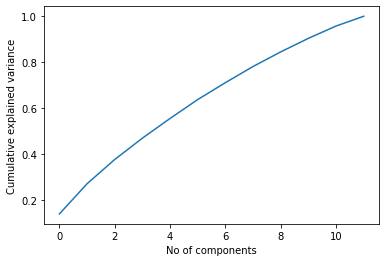

In [22]:
pca = PCA().fit(df_std)
varianceExplained=0.950
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
preProc = sklearn.decomposition.PCA(n_components=varianceExplained) 
preProc.fit(A)
print(preProc.components_.shape[1])
plt.ylabel("Cumulative explained variance")
plt.show()

In [119]:
X_train_Transformed = preProc.transform(X_train)
X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)
diff = X_train_Transf_decompressed - X_train # tableau de taille Nx 64

totalMeanSquaredError = np.mean(diff**2)
print("MSE totale (Mean Squared Error)", totalMeanSquaredError)

MSE totale (Mean Squared Error) 0.06298954673184495


In [120]:
import sklearn.datasets
K,Z= sklearn.datasets.load_digits(n_class=2, return_X_y=True)
D = K.shape[1]
erreurs = np.zeros(D)
for i, nc in enumerate(range(D)): 
    preProc = sklearn.decomposition.PCA(n_components=12, copy=True)
    preProc.fit(X_train) # calcul de la matrice de passage par sklearn
    X_train_Transformed = preProc.transform(X_train)
    X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)

    diff = X_train_Transf_decompressed - X_train # tableau de taille Nx 64
    totalMeanSquaredError = np.mean(diff**2)
    erreurs[i] = totalMeanSquaredError



Text(0, 0.5, 'erreur')

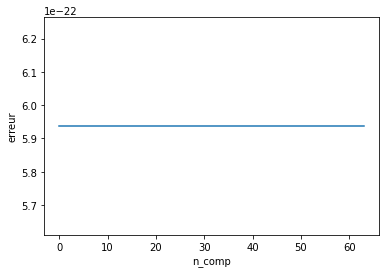

In [121]:
plt.plot(np.arange(D), erreurs)
plt.xlabel("n_comp")
plt.ylabel("erreur")



In [122]:
linear_training_score = []
linear_valid_score = []
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X,ratio_train, ratio_valid)
## TODO: pour differentes valeurs de n_components, realiser une PCA
## puis un apprentissssage supervise des classes
nComp_range = np.arange(1, X.shape[1], 2)
for nC in nComp_range:
    preProc = sklearn.decomposition.PCA(n_components=nC) ## TODO
    preProc.fit(X_train)
    ## TODO: transformer les donnees selon cette transformation apprise
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)

    
    ## TODO: faire l'apprentissage supervisé des classes ,
    ## a l'aide d'un SVM polynomial de degre 2 (et avec C=1, coef0 = 1)
    C=1
    degree =3 
    kernel = 'poly'
    clf = sklearn.svm.SVC(C=C, kernel=kernel, degree=degree)
    clf
    
    ## TODO: transformer les donnees selon cette transformation apprise
    clf.fit(X_train_Transformed, y_train)
    ## TODO: calculer les scores a l'aide de clf.score()
    trainscore = clf.score(X_train_Transformed, y_train) # TODO
    validscore = clf.score(X_valid_Transformed, y_valid)

    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    linear_training_score.append(trainscore)
    linear_valid_score.   append(validscore)

IndexError: tuple index out of range

In [123]:
df_cov_matrix = np.cov(df_std.T)
#df_cov_matrix

In [124]:
#eig_vals, eig_vecs = np.linalg.eig(heart)

In [125]:
#eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])

#for i in range(len(eig_vals))]
 #   print(‘Eigenvalues in descending order:’)
#for i in eig_pairs:
 #   print(i[0])

In [21]:
from sklearn.decomposition import PCA

#pca = PCA().fit(df_std)
varianceExplained=0.950
preProc = sklearn.decomposition.PCA(ncomponents=varianceExplained) 
preProc.fit(heart)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
#plt.ylabel(‘Cumulative explained variance’)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'ncomponents'

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


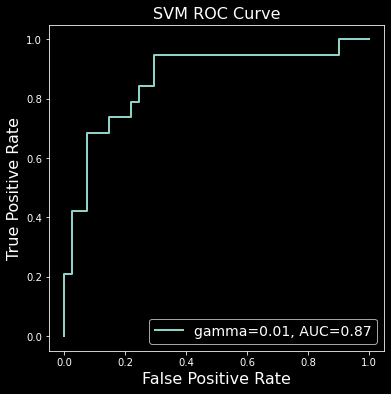

In [23]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

Y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


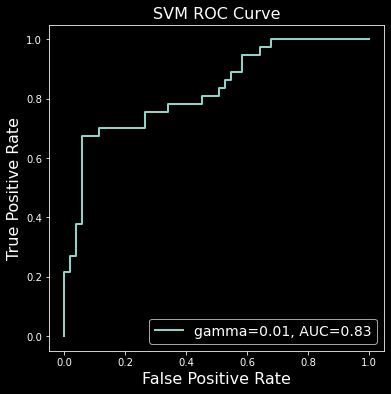

In [52]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [55]:
dataframe = heart[features]
Pos = np.where(B==1, 0, 1)

In [56]:
df_pos = heart[heart.DEATH_EVENT==1]
df_neg = heart[heart.DEATH_EVENT==0]

features_pos = df_pos[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

reste_pos = df_pos[['DEATH_EVENT']]

x_pos = np.asarray(features_pos)

Y_pos = np.asarray(reste_pos)

In [57]:
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, Y_train_pos, Y_test_pos = train_test_split(x_pos, Y_pos, test_size=0.2, random_state = 4)

In [58]:
X_train_pos.shape, Y_train_pos.shape

((76, 12), (76, 1))

In [61]:
fpr.shape

(30,)

In [24]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
Y_test

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [209]:
i = 0
nombre_FP = 0
nombre_FN = 0

while i < y_predict.shape[0]:
    i = i+1
    if(y_predict[i-1]!=Y_test[i-1] & Y_test[i-1]==1) :
        nombre_FN = nombre_FN + 1
    if(y_predict[i-1]!=Y_test[i-1] & Y_test[i-1]==0) :
        nombre_FP = nombre_FP + 1

In [210]:
print(nombre_FP)
print(nombre_FN)

2
14


In [ ]:
X.shape[0]

In [19]:
valeurs_train_score = []
valeurs_valid_score = []
it = 0
while it < X.shape[0]:
    A_prov = A[:,:it]
    B_prob = B[:,:it]
    X_train_prov, X_test_prov, Y_train_prov, Y_test_prov = train_test_split(A_prov, B_prov, test_size=0.2, random_state=42)
    x1_train_prov_bis, y1_train_prov_bis, X1_valid_prov, y1_valid_prov = load_train_et_val(X_train_prov,1)
    clf_ = sklearn.svm.SVC(kernel='linear', C=2)
    clf_.fit(X_train,Y_train)
    valeurs_train_score.append(x1_train_prov_bis)
    valeurs_valid_score.append(X1_valid_prov)
    it = it+1


NameError: name 'train_test_split' is not defined

ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

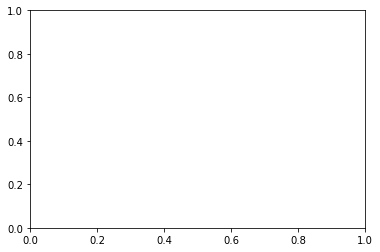

In [25]:
ordonnées1 = np.array(valeurs_train_score)
ordonnées2 = np.array(valeurs_valid_score)
abscisse = np.array([0,1,2,3,4,5,6,7,9,10,11])
plt.plot(abscisse, ordonnées1)
plt.plot(abscisse, ordonnées2)
plt.show()

(299, 4)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(heart)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [11]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
principalDf

,principal component 1,principal component 2
0,-0.881272,1.270108
1,-0.241344,1.899124
2,1.971364,-1.468052
3,1.673735,-1.321057
4,-0.970092,0.707823
...,...,...
294,-0.249695,-1.711844
295,-1.735117,1.651359
296,2.044155,1.079197
297,-0.498622,1.029063
